In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as mp


In [3]:
img = cv.imread("doramon.jpg",0)
img = cv.resize(img,(400,400))
img = cv.cvtColor(img,cv.COLOR_RGB2BGR)

In [4]:
def translation(img,x,y):
    w,h = img.shape[:2]
    img1 = np.zeros_like(img,dtype = np.uint8)
    kernel = np.array([[1,0,x],[0,1,y],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1 = np.array([[i],[j],[1]])
            result = np.dot(kernel,mat1)
            m = int(result[0][0])
            n = int(result[1][0])
            if m<w and n<h:
                img1[m][n]=img[i][j]
    return img1

In [5]:
t = translation(img,100,50)

In [6]:
def shearing(img,x,y):
    w,h=img.shape[:2]
    img1=np.zeros_like(img,dtype=np.uint8)
    kernel=np.array([[1,x,0],[y,1,0],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1=np.array([[i],[j],[1]])
            result=np.dot(kernel,mat1)
            m=int(result[0][0])
            n=int(result[1][0]) 
            if 0 <=m<w and 0 <=n<h:
                img1[m][n] = img[i][j]
    return img1

In [7]:
s = shearing(img,0.2,0.5)

In [8]:
def scaling(img,x,y):
    w,h=img.shape[:2]
    img1=np.zeros_like(img,dtype=np.uint8)
    kernel=np.array([[x,0,1],[0,y,1],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1=np.array([[i],[j],[1]])
            result=np.dot(kernel,mat1)
            m=int(result[0][0])
            n=int(result[1][0]) 
            if 0 <= m < w and 0 <= n < h:
                img1[m][n] = img[i][j]
    return img1

In [9]:
sc = scaling(img,2,1)

In [10]:
def Reflection_x(img):
    w,h=img.shape[:2]
    img1=np.zeros_like(img,dtype=np.uint8)
    kernel=np.array([[1,0,0],[0,-1,w],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1=np.array([[i],[j],[1]])
            result=np.dot(kernel,mat1)
            m=int(result[0][0])
            n=int(result[1][0]) 
            if 0 <= m < w and 0 <= n < h:
                img1[m][n] = img[i][j]
    return img1

In [11]:
ref_x = Reflection_x(img)

In [12]:
def Reflection_y(img):
    w,h=img.shape[:2]
    img1=np.zeros_like(img,dtype=np.uint8)
    kernel=np.array([[-1,0,h],[0,1,0],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1=np.array([[i],[j],[1]])
            result=np.dot(kernel,mat1)
            m=int(result[0][0])
            n=int(result[1][0]) 
            if 0 <= m < w and 0 <= n < h:
                img1[m][n] = img[i][j]
    return img1

In [13]:
ref_y = Reflection_y(img)

In [18]:
def Rotation(img,angle):
    w,h=img.shape[:2]
    x = mp.cos(mp.radians(angle))
    y = mp.sin(mp.radians(angle))
    img1=np.zeros_like(img,dtype=np.uint8)
    kernel=np.array([[x,y,0],[-y,x,0],[0,0,1]])
    for i in range(w):
        for j in range(h):
            mat1=np.array([[i],[j],[1]])
            result=np.dot(kernel,mat1)
            m=int(result[0][0])
            n=int(result[1][0]) 
            if 0 <= m < w and 0 <= n < h:
                img1[m][n] = img[i][j]
    return img1

In [19]:
r= Rotation(img,30)

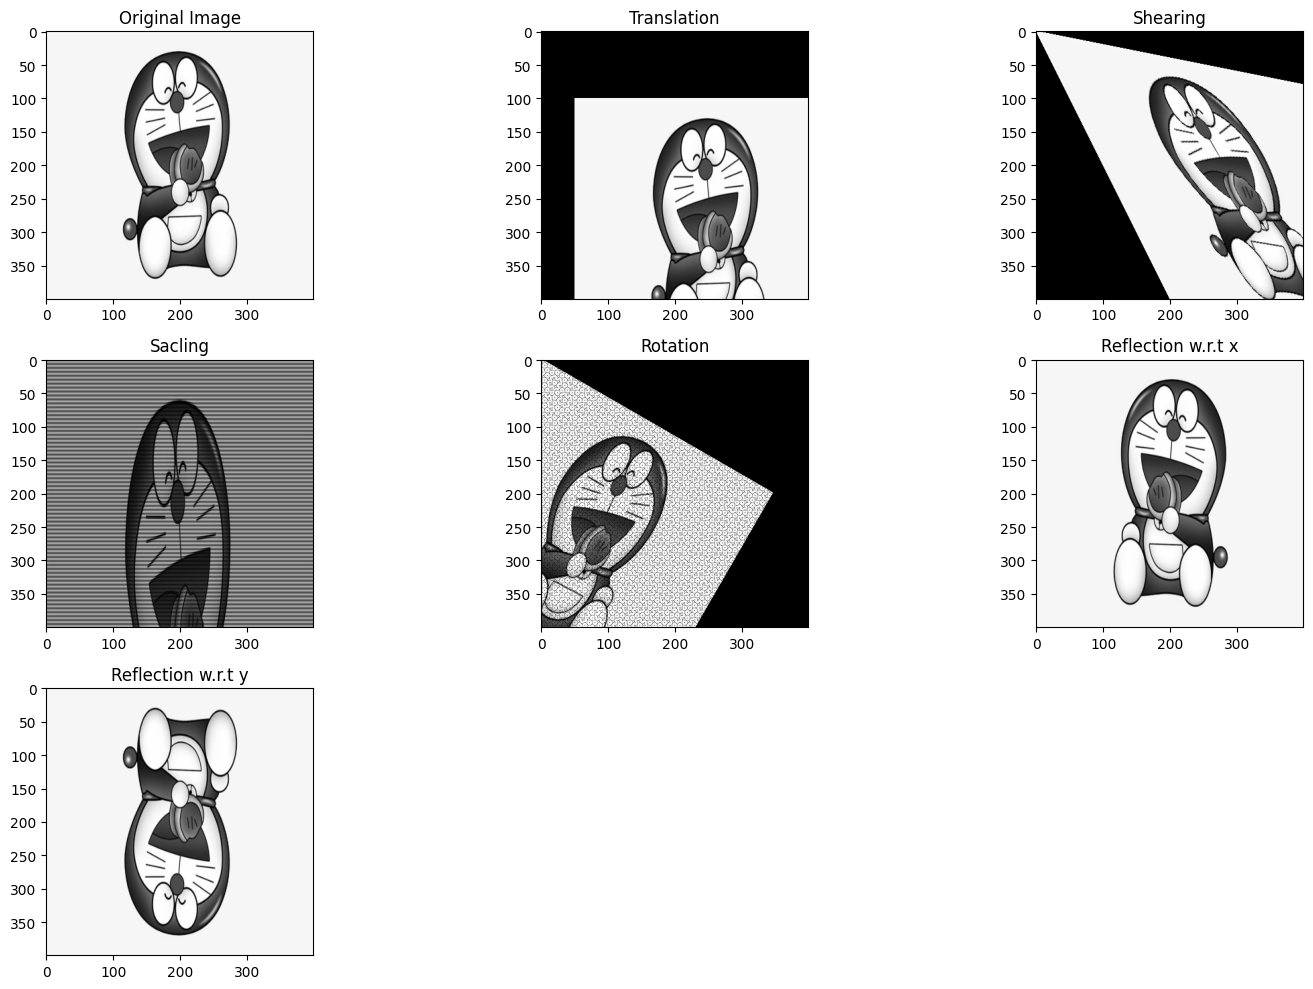

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(3, 3, 2), plt.imshow(t, cmap='gray'), plt.title('Translation')
plt.subplot(3, 3, 3), plt.imshow(s, cmap='gray'), plt.title('Shearing')
plt.subplot(3, 3, 4), plt.imshow(sc, cmap='gray'), plt.title('Sacling')
plt.subplot(3, 3, 5), plt.imshow(r, cmap='gray'), plt.title('Rotation')
plt.subplot(3, 3, 6), plt.imshow(ref_x, cmap='gray'), plt.title('Reflection w.r.t x')
plt.subplot(3, 3, 7), plt.imshow(ref_y, cmap='gray'), plt.title('Reflection w.r.t y')

plt.tight_layout()
plt.show()
